<h1 style="text-align: center;">AMAZON DATA CLEANING</h1>

## 0. PACKAGE REQUIREMENT LIST

In [1]:
# Package requirement list

import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


/Users/emilialautz/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## 1. EXPLORATORY DATA ANALYSIS

In [2]:
# Read the CSV file into a DataFrame

file_path = 'raw_data/amazon_data_raw.csv'
jobs_df = pd.read_csv(file_path, index_col=0)

# Display the DataFrame
jobs_df[:10]

,URL,Job_Title,Job_ID,Basic_Qualifications,Preferred_Qualifications,Minimum_Pay,Maximum_Pay
0,https://www.amazon.jobs/en-gb/jobs/2646276/gra...,Graduate Software Development Engineer – Redsh...,2646276,BASIC QUALIFICATIONS\n• A degree in Computer S...,PREFERRED QUALIFICATIONS\n• Strong knowledge o...,NaN,NaN
1,https://www.amazon.jobs/en-gb/jobs/2606989/sof...,"Software Development Engineer III, Aurora Limi...",2606989,BASIC QUALIFICATIONS\n- 4+ years of database e...,PREFERRED QUALIFICATIONS\n- 7+ years of full s...,NaN,NaN
2,https://www.amazon.jobs/en-gb/jobs/2557049/sof...,"Software Embedded Engineer, AWS Nitro",2557049,BASIC QUALIFICATIONS\n- 5 + years of experienc...,PREFERRED QUALIFICATIONS\n- Experience with mi...,NaN,NaN
3,https://www.amazon.jobs/en-gb/jobs/2607004/sof...,"Software Development Engineer II, Aurora Limit...",2607004,BASIC QUALIFICATIONS\n- 2+ years of database e...,PREFERRED QUALIFICATIONS\n- 3+ years of full s...,NaN,NaN
4,https://www.amazon.jobs/en-gb/jobs/2667469/sof...,"Software Development Engineer, AWS, EC2 Live M...",2667469,BASIC QUALIFICATIONS\n- Experience (non-intern...,PREFERRED QUALIFICATIONS\n- Bachelor's degree ...,NaN,NaN
5,https://www.amazon.jobs/en-gb/jobs/2497949/nit...,"Nitro Linux Kernel Software Engineer, AWS EC2 ...",2497949,BASIC QUALIFICATIONS\n- 3+ years of non-intern...,PREFERRED QUALIFICATIONS\n- 3+ years of full s...,"$115,000/year","$223,600/year"
6,https://www.amazon.jobs/en-gb/jobs/2627315/sof...,"Software Development Engineer, EC2 Nitro Cordite",2627315,BASIC QUALIFICATIONS\n- 3+ years of non-intern...,PREFERRED QUALIFICATIONS\n- 3+ years of full s...,"$129,300/year","$223,600/year"
7,https://www.amazon.jobs/en-gb/jobs/2658044/sof...,"Software Development Engineer, CFN Core",2658044,BASIC QUALIFICATIONS\n- 3+ years of non-intern...,PREFERRED QUALIFICATIONS\n- 3+ years of full s...,"$129,300/year","$223,600/year"
8,https://www.amazon.jobs/en-gb/jobs/2535023/sof...,"Software Development Engineer, EC2 Nitro",2535023,BASIC QUALIFICATIONS\n- 3+ years of non-intern...,PREFERRED QUALIFICATIONS\n- 3+ years of full s...,"$115,000/year","$223,600/year"
9,https://www.amazon.jobs/en-gb/jobs/2600332/sof...,"Software Engineer- AI/ML, AWS Neuron Distribut...",2600332,BASIC QUALIFICATIONS\n- 3+ years of non-intern...,PREFERRED QUALIFICATIONS\n- 3+ years of full s...,"$129,300/year","$223,600/year"


In [3]:
jobs_df.isna().sum()

URL                           0
Job_Title                     0
Job_ID                        0
Basic_Qualifications          0
Preferred_Qualifications      0
Minimum_Pay                 258
Maximum_Pay                 258
dtype: int64

In [4]:
jobs_df.dtypes

URL                         object
Job_Title                   object
Job_ID                       int64
Basic_Qualifications        object
Preferred_Qualifications    object
Minimum_Pay                 object
Maximum_Pay                 object
dtype: object

## 2. DATA CLEANING

In [5]:
# Clean the variables Minimum_Pay and Maximum_Pay

# Minimum Pay
jobs_df['Minimum_Pay'] = jobs_df['Minimum_Pay'].str.replace(r'[^0-9]', '', regex=True)
jobs_df['Minimum_Pay'] = pd.to_numeric(jobs_df['Minimum_Pay'], errors='coerce')

# Maximum Pay
jobs_df['Maximum_Pay'] = jobs_df['Maximum_Pay'].str.replace(r'[^0-9]', '', regex=True)
jobs_df['Maximum_Pay'] = pd.to_numeric(jobs_df['Maximum_Pay'], errors='coerce')

In [6]:
# Clean the variables Basic_Qualifications und Preferred_Qualifications

# Basic Qualifications
jobs_df['Basic_Qualifications'] = jobs_df['Basic_Qualifications'].str.replace("BASIC QUALIFICATIONS\n", "", regex=False)

qualifications_split = jobs_df['Basic_Qualifications'].str.split('\n', expand=True)

# Remove leading bullets and spaces
def clean_bullet_points(text):
    if isinstance(text, str):
        return text.lstrip('-•').strip() 
    return text

qualifications_split = qualifications_split.applymap(clean_bullet_points)

qualifications_split.columns = ['BQ_' + str(i+1) for i in range(qualifications_split.shape[1])]
jobs_df = pd.concat([jobs_df, qualifications_split], axis=1).drop(columns=['Basic_Qualifications'])

# Preferred Qualifications
jobs_df['Preferred_Qualifications'] = jobs_df['Preferred_Qualifications'].str.replace("PREFERRED QUALIFICATIONS\n", "", regex=False)

qualifications_split = jobs_df['Preferred_Qualifications'].str.split('\n', expand=True)

# Remove leading bullets and spaces
def clean_bullet_points(text):
    if isinstance(text, str):
        return text.lstrip('-•').strip() 
    return text

qualifications_split = qualifications_split.applymap(clean_bullet_points)

qualifications_split.columns = ['PQ_' + str(i+1) for i in range(qualifications_split.shape[1])]
jobs_df = pd.concat([jobs_df, qualifications_split], axis=1).drop(columns=['Preferred_Qualifications'])

## 3. CREATE NEW VARIABLES

- "Degree"
- "Software_Programming"
- "C_Programming"
- "Python_Programming"
- "JavaScript_Programming"
- "Professional_Software_Experience"
- "Management_Skills"
- "Engineer"
- "Previous_Pay"

In [7]:
# Filter out the preferred qualifications columns

jobs_df_filtered = jobs_df.copy()
jobs_df_filtered = jobs_df_filtered.filter(regex='^(?!PQ_)')
jobs_df_filtered[:2]

,URL,Job_Title,Job_ID,Minimum_Pay,Maximum_Pay,BQ_1,BQ_2,BQ_3,BQ_4,BQ_5,BQ_6,BQ_7,BQ_8,BQ_9,BQ_10,BQ_11,BQ_12,BQ_13
0,https://www.amazon.jobs/en-gb/jobs/2646276/gra...,Graduate Software Development Engineer – Redsh...,2646276,NaN,NaN,A degree in Computer Science / Engineering / M...,Programming experience with C or C++,"Internship, project, or academic experience in...",None,None,None,None,None,None,None,None,None,None
1,https://www.amazon.jobs/en-gb/jobs/2606989/sof...,"Software Development Engineer III, Aurora Limi...",2606989,NaN,NaN,4+ years of database engine development experi...,7+ years of non-internship professional softwa...,7+ years of programming experience,"Experience as a mentor, tech lead or leading a...",Bachelor's degree in computer science or equiv...,None,None,None,None,None,None,None,None


### A. Degree

In [8]:
def check_degree(row):
    """Check if the row contains a degree and return the degree level as an integer.
    "No_Degree": No degree
    "Bachelor": Bachelor's degree
    "Master": Master's degree
    "Other": Other degree (e.g., Ph.D.)"""

    degree = "No_Degree"
    for value in row:
        if isinstance(value, str):
            if "bachelor's degree" in value.lower():
                degree = "Bachelor"
            elif "B.Sc" in value:
                degree = "Bachelor"
            elif "M.Sc" in value:
                degree = "Master"
            elif "master's degree" in value.lower():
                degree = "Master"
            elif "degree" in value.lower():
                degree = "Other"
    return degree

# Apply the function to each row to create the 'Degree' column
jobs_df_filtered['Degree'] = jobs_df_filtered.apply(check_degree, axis=1)

# One-hot encode the degree variable (No_Degree as baseline)
jobs_df_filtered['Degree'] = pd.Categorical(jobs_df_filtered['Degree'], categories=['No_Degree', 'Bachelor', 'Master', 'Other'], ordered=True)
jobs_df_filtered = pd.get_dummies(jobs_df_filtered, columns=['Degree'], drop_first=True)

### B. Software Programming

In [9]:
def check_software_programming(row):
    """Check if the row contains experience programming with at least one software programming language.
    0: No programming experience
    1: Experience programming with at least one software programming language"""

    software_programming = 0
    for value in row:
        if isinstance(value, str):
            if "experience programming with at least one software programming language" in value.lower():
                software_programming = 1
    return software_programming

# Apply the function to each row to create the 'Software_Programming' column
jobs_df_filtered['Software_Programming'] = jobs_df_filtered.apply(check_software_programming, axis=1)

### C. C_Programming

In [10]:
def check_c_programming(row):
    """Check if the row contains experience with programming in C.
    0: No experience with programming in C
    1: Experience with programming in C"""

    c_programming = 0
    for value in row:
        if isinstance(value, str):
            if "programming experience with c" in value.lower():
                c_programming = 1
            elif "fluent in c" in value.lower():
                c_programming = 1
            elif "programming skills in c" in value.lower():
                c_programming = 1
            elif "proficient in c" in value.lower():
                c_programming = 1
            elif "c++" in value.lower():
                c_programming = 1
    
    return c_programming

# Apply the function to each row to create the 'C_Programming' column
jobs_df_filtered['C_Programming'] = jobs_df_filtered.apply(check_c_programming, axis=1)

### D. Python_Programming

In [11]:
def check_python_programming(row):
    """Check if the row contains experience with programming in Python.
    0: No experience with programming in Python
    1: Experience with programming in Python"""
    
    for value in row:
        if isinstance(value, str):
            if "python" in value.lower():
                return 1
    return 0

# Apply the function to each row to create the 'Python_Programming' column
jobs_df_filtered['Python_Programming'] = jobs_df_filtered.apply(check_python_programming, axis=1)

### E. JavaScript_Programming

In [12]:
def check_javascript_programming(row):
    """Check if the row contains experience with programming in JavaScript.
    0: No experience with programming in JavaScript
    1: Experience with programming in JavaScript"""
    
    for value in row:
        if isinstance(value, str):
            if "javascript" in value.lower():
                return 1
    return 0

# Apply the function to each row to create the 'JavaScript_Programming' column
jobs_df_filtered['JavaScript_Programming'] = jobs_df_filtered.apply(check_javascript_programming, axis=1)

### F. Professional Software Experience

In [13]:
def check_professional_software_experience(row):
    """Extracts the number of years of non-internship professional software development experience."""
    for value in row:
        if isinstance(value, str):
            match = re.search(r'(\d+)\+? years? of non-internship professional software development experience', value.lower())
            if match:
                return int(match.group(1))
    for value in row:
        if isinstance(value, str):
            if "experience (non-internship) in professional software development" in value.lower():
                return 1
    return 0

# Apply the function to each row to create the 'Professional_Software_Experience' column
jobs_df_filtered['Professional_Software_Experience'] = jobs_df_filtered.apply(check_professional_software_experience, axis=1)

### G. Management skills

In [14]:
def check_management_skills(row):
    """Extracts whether a row contains management skills."""
    bq_columns = row.filter(like='BQ_')
    for value in bq_columns:
        if isinstance(value, str):
            if "manager" in value.lower():
                return 1
            elif "management" in value.lower():
                return 1
    return 0

# Apply the function to each row to create the 'Management_Skills' column
jobs_df_filtered['Management_Skills'] = jobs_df_filtered.apply(check_management_skills, axis=1)

### H. Engineer

In [15]:
def check_engineer(row):
    """Extracts whether a row contains the term 'engineer'."""
    bq_columns = row.filter(like='BQ_')
    for value in bq_columns:
        if isinstance(value, str):
            if "engineer" in value.lower():
                return 1
    return 0

# Apply the function to each row to create the 'Engineer' column
jobs_df_filtered['Engineer'] = jobs_df_filtered.apply(check_engineer, axis=1)

In [16]:
jobs_df_filtered[(jobs_df_filtered['Degree_Bachelor'] == 0) & 
                 (jobs_df_filtered['Degree_Master'] == 0) & 
                 (jobs_df_filtered['Degree_Other'] == 0) & 
                 (jobs_df_filtered['Software_Programming'] == 0) & 
                 (jobs_df_filtered['C_Programming'] == 0) &
                 (jobs_df_filtered['Python_Programming'] == 0) &
                 (jobs_df_filtered['JavaScript_Programming'] == 0) &
                 (jobs_df_filtered['Professional_Software_Experience'] == 0) &
                 (jobs_df_filtered['Management_Skills'] == 0) &
                 (jobs_df_filtered['Engineer'] == 0)]

,URL,Job_Title,Job_ID,Minimum_Pay,Maximum_Pay,BQ_1,BQ_2,BQ_3,BQ_4,BQ_5,...,Degree_Bachelor,Degree_Master,Degree_Other,Software_Programming,C_Programming,Python_Programming,JavaScript_Programming,Professional_Software_Experience,Management_Skills,Engineer
102,https://www.amazon.jobs/en-gb/jobs/2583917/ker...,"Kernel/Hypervisor Engineer, EC2 Accelerated Nitro",2583917,NaN,NaN,3+ years of computer science fundamentals (obj...,2+ years of non-internship design or architect...,"Experience of writing clean,optimized and scal...",3+ years of experience using the typical Linux...,Understanding of operating systems internals.,...,0,0,0,0,0,0,0,0,0,0
245,https://www.amazon.jobs/en-gb/jobs/2589281/dat...,Data Center Engineering Operations,2589281,NaN,NaN,4+ years experience in electrical or mechanica...,Experience in maintaining Data center or Criti...,Strong verbal and written communication skills,"IT services such as servers, network, cabling ...",None,...,0,0,0,0,0,0,0,0,0,0
272,https://www.amazon.jobs/en-gb/jobs/2654068/sof...,"Software Development Engineer, AWS DNS",2654068,NaN,NaN,Experience building complex software systems t...,None,None,None,None,...,0,0,0,0,0,0,0,0,0,0
387,https://www.amazon.jobs/en-gb/jobs/2581878/sr-...,"Sr. Front-end Engineer, Amplify",2581878,134500.0,261500.0,5+ years of professional software development ...,None,None,None,None,...,0,0,0,0,0,0,0,0,0,0
405,https://www.amazon.jobs/en-gb/jobs/2659146/ict...,"ICT Design Engineer, Physical Stores",2659146,NaN,NaN,* BICSI RCDD Certification or internationally ...,* 5+ years Information and Communications Tech...,* 5+ years of working experience with fiber op...,* 5+ years of experience developing design doc...,None,...,0,0,0,0,0,0,0,0,0,0
485,https://www.amazon.jobs/en-gb/jobs/2656674/pri...,"Principal Engineer, Aurora PostgreSQL Engine",2656674,180100.0,311200.0,"Knowledge of object-oriented design, data stru...",None,None,None,None,...,0,0,0,0,0,0,0,0,0,0
542,https://www.amazon.jobs/en-gb/jobs/2583578/ker...,"Kernel/Hypervisor Engineer, EC2 Accelerated Nitro",2583578,NaN,NaN,3+ years of computer science fundamentals (obj...,2+ years of non-internship design or architect...,"Experience of writing clean,optimized and scal...",3+ years of experience using the typical Linux...,Understanding of operating systems internals.,...,0,0,0,0,0,0,0,0,0,0
559,https://www.amazon.jobs/en-gb/jobs/2428964/ker...,"Kernel/Hypervisor Engineer, EC2 Accelerated Nitro",2428964,NaN,NaN,3+ years of computer science fundamentals (obj...,2+ years of non-internship design or architect...,"Experience of writing clean,optimized and scal...",3+ years of experience using the typical Linux...,Understanding of operating systems internals.,...,0,0,0,0,0,0,0,0,0,0
571,https://www.amazon.jobs/en-gb/jobs/2473454/ker...,"Kernel/Hypervisor Engineer, EC2 Accelerated Nitro",2473454,NaN,NaN,3+ years of computer science fundamentals (obj...,2+ years of non-internship design or architect...,"Experience of writing clean,optimized and scal...",3+ years of experience using the typical Linux...,Understanding of operating systems internals.,...,0,0,0,0,0,0,0,0,0,0
573,https://www.amazon.jobs/en-gb/jobs/2594154/fro...,"Front End Engineer, Simple Email Service",2594154,NaN,NaN,3+ years of professional front end development...,Experience in at least one front-end framework...,Proficient in view layout and rendering techno...,None,None,...,0,0,0,0,0,0,0,0,0,0


In [17]:
# Filter out the columns that have a zero value for all the features
jobs_df_filtered = jobs_df_filtered[(jobs_df_filtered['Degree_Bachelor'] != 0) | 
                                    (jobs_df_filtered['Degree_Master'] != 0) | 
                                    (jobs_df_filtered['Degree_Other'] != 0) | 
                                    (jobs_df_filtered['Software_Programming'] != 0) | 
                                    (jobs_df_filtered['C_Programming'] != 0) | 
                                    (jobs_df_filtered['Python_Programming'] != 0) |
                                    (jobs_df_filtered['JavaScript_Programming'] != 0) | 
                                    (jobs_df_filtered['Professional_Software_Experience'] != 0) | 
                                    (jobs_df_filtered['Management_Skills'] != 0) | 
                                    (jobs_df_filtered['Engineer'] != 0)]

len(jobs_df_filtered)

806

## 4. Impute Missing Values in the Payment Variables

In [18]:
# Overview on the missing values in Minimum_Payment

jobs_df_filtered[jobs_df_filtered['Minimum_Pay'].isna()][:5]

,URL,Job_Title,Job_ID,Minimum_Pay,Maximum_Pay,BQ_1,BQ_2,BQ_3,BQ_4,BQ_5,...,Degree_Bachelor,Degree_Master,Degree_Other,Software_Programming,C_Programming,Python_Programming,JavaScript_Programming,Professional_Software_Experience,Management_Skills,Engineer
0,https://www.amazon.jobs/en-gb/jobs/2646276/gra...,Graduate Software Development Engineer – Redsh...,2646276,NaN,NaN,A degree in Computer Science / Engineering / M...,Programming experience with C or C++,"Internship, project, or academic experience in...",None,None,...,0,0,1,0,1,0,0,0,1,1
1,https://www.amazon.jobs/en-gb/jobs/2606989/sof...,"Software Development Engineer III, Aurora Limi...",2606989,NaN,NaN,4+ years of database engine development experi...,7+ years of non-internship professional softwa...,7+ years of programming experience,"Experience as a mentor, tech lead or leading a...",Bachelor's degree in computer science or equiv...,...,1,0,0,0,0,0,0,7,0,1
2,https://www.amazon.jobs/en-gb/jobs/2557049/sof...,"Software Embedded Engineer, AWS Nitro",2557049,NaN,NaN,5 + years of experience with embedded SW devel...,Bachelor's degree in Electrical/Computer Scien...,Fluent in C,Experience with HW/SW interfaces,None,...,1,0,0,0,1,0,0,0,0,0
3,https://www.amazon.jobs/en-gb/jobs/2607004/sof...,"Software Development Engineer II, Aurora Limit...",2607004,NaN,NaN,2+ years of database engine development experi...,3+ years of non-internship professional softwa...,3+ years of programming experience,None,None,...,0,0,0,0,0,0,0,3,0,0
4,https://www.amazon.jobs/en-gb/jobs/2667469/sof...,"Software Development Engineer, AWS, EC2 Live M...",2667469,NaN,NaN,Experience (non-internship) in professional so...,Experience designing or architecting (design p...,Experience with full software development life...,Experience in computer architecture,Strong programming skills in C.,...,0,0,0,0,1,0,0,1,1,0


### Impute missing values in Minimum_Pay using a regression

In [19]:
# Separate the columns to be used for prediction
predictors = ['Degree_Bachelor', 
              'Degree_Master',
              'Degree_Other',
              'Software_Programming', 
              'C_Programming', 
              'Python_Programming', 
              'JavaScript_Programming',
              'Professional_Software_Experience', 
              'Management_Skills', 
              'Engineer']

# Create the pipeline with the preprocessor and the regressor
model = Pipeline(steps=[
    ('regressor', LinearRegression())
])

# Function to impute missing values using the regression model
def impute_missing_values(df, target):

    # Train test split
    train_data = df[df[target].notna()]
    predict_data = df[df[target].isna()]
    
    # Fit the model on the training data
    model.fit(train_data[predictors], train_data[target])
    
    # Predict the missing values
    df.loc[df[target].isna(), target] = model.predict(predict_data[predictors])

# Impute missing values for 'Minimum_Pay'
impute_missing_values(jobs_df_filtered, 'Minimum_Pay')

# Impute missing values for 'Maximum_Pay'
impute_missing_values(jobs_df_filtered, 'Maximum_Pay')

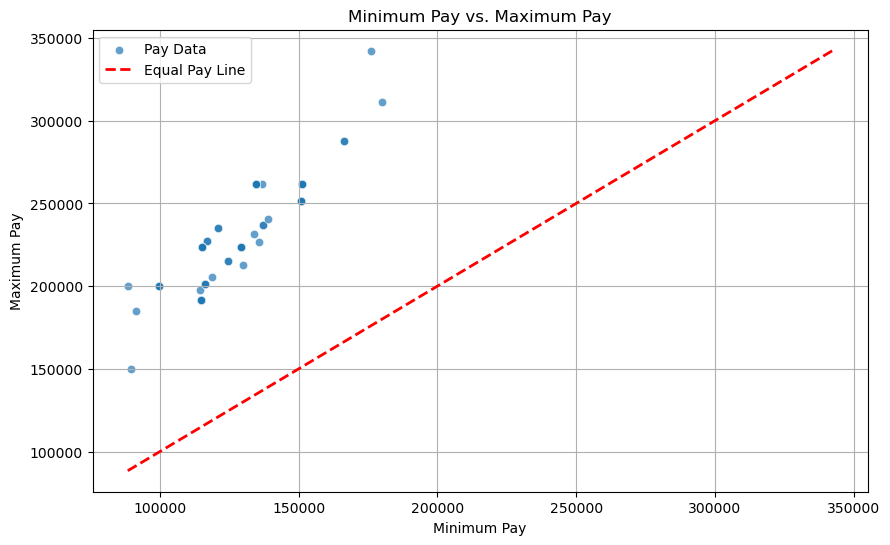

In [20]:
# Plot Minimum_Pay against Maximum_Pay

plt.figure(figsize=(10, 6))
plt.scatter(jobs_df['Minimum_Pay'], jobs_df['Maximum_Pay'], alpha=0.7, edgecolors='w', linewidth=0.5, label='Pay Data')

# Plot the line where Minimum_Pay equals Maximum_Pay
max_value = max(jobs_df['Minimum_Pay'].max(), jobs_df['Maximum_Pay'].max())
min_value = min(jobs_df['Minimum_Pay'].min(), jobs_df['Maximum_Pay'].min())
plt.plot([min_value, max_value], [min_value, max_value], color='red', linestyle='--', linewidth=2, label='Equal Pay Line')

plt.title('Minimum Pay vs. Maximum Pay')
plt.xlabel('Minimum Pay')
plt.ylabel('Maximum Pay')
plt.grid(True)
plt.legend()
plt.show()

In [21]:
# Get summary statistics on the payment variables
jobs_df_filtered[['Minimum_Pay', 'Maximum_Pay']].describe()

,Minimum_Pay,Maximum_Pay
count,806.000000,806.000000
mean,130191.816545,232093.553948
std,12599.652932,19678.152827
min,88400.000000,149800.000000
25%,124660.844036,223600.000000
50%,129300.000000,223600.000000
75%,134500.000000,250801.580025
max,176100.000000,342300.000000


In [22]:
# Save the dataframe to a csv file

jobs_df_filtered.to_csv('cleaned_data/jobs_cleaned.csv')